In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

1.	Driver & Constructor Performance<br>
	Identify dominant drivers and constructors by analyzing win ratios and podium finishes.<br>
    Assess the relationship between career longevity and success metrics (wins, podiums, points).


In [ ]:
import pandas as pd

results = pd.read_csv("final_dataset/results.csv")
drivers = pd.read_csv("final_dataset/drivers.csv")
constructors = pd.read_csv("final_dataset/constructors.csv")

results = results.merge(drivers[['driverId','forename','surname']], on='driverId', how='left')
results = results.merge(constructors[['constructorId', 'name']], on='constructorId', how='left')

In [ ]:
results['forename'] = results['forename'].astype('str')
results['surname'] = results['surname'].astype('str')
results['Name']  = results['forename']+" "+results['surname']
results.rename(columns={'name': 'Constructor_name'}, inplace=True)

In [ ]:
results.drop(columns=['forename','surname'],inplace=True)

In [ ]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,positionText,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapSpeed,status,fastestlaptime_ms,Constructor_name,Name
0,1,18,1,1,22,1,1,1,10.0,58,5690616,39,2,218.300,Finished,87452,mclaren,lewis hamilton
1,2,18,2,2,3,5,2,2,8.0,58,5696094,41,3,217.586,Finished,87739,bmw sauber,nick heidfeld
2,3,18,3,3,7,7,3,3,6.0,58,5698779,41,5,216.719,Finished,88090,williams,nico rosberg
3,4,18,4,4,5,11,4,4,5.0,58,5707797,58,7,215.464,Finished,88603,renault,fernando alonso
4,5,18,5,1,23,3,5,5,4.0,58,5708630,43,1,218.385,Finished,87418,mclaren,heikki kovalainen


In [ ]:
driver_stats = {}
constructor_stats = {}
for index, row in results.iterrows():
    driver = row['Name']
    constructor = row['Constructor_name']
    if driver not in driver_stats.keys():
        driver_stats[driver] = {'wins': 0, 'podiums': 0, 'total': 0, 'total_pts': 0}
    if constructor not in constructor_stats.keys():
        constructor_stats[constructor] = {'wins': 0, 'podiums': 0, 'total': 0, 'total_pts': 0}

    if row['positionOrder'] == 1:
        driver_stats[driver]['wins'] += 1
        constructor_stats[constructor]['wins'] += 1
    if row['positionOrder'] <= 3:
        driver_stats[driver]['podiums'] += 1
        constructor_stats[constructor]['podiums'] += 1
    constructor_stats[constructor]['total'] += 1
    driver_stats[driver]['total'] +=1
    driver_stats[driver]['total_pts'] += row['points']


driver_performance = pd.DataFrame.from_dict(driver_stats, orient='index').reset_index()
driver_performance.rename(columns={'index': 'name'}, inplace=True)
print("Driver")
print(driver_performance.head())
print()

constructor_performance = pd.DataFrame.from_dict(constructor_stats, orient='index').reset_index()
constructor_performance.rename(columns={'index': 'name'}, inplace=True)
print("Constructor")
print(constructor_performance.head())

Driver
                name  wins  podiums  total  total_pts
0     lewis hamilton   105      202    356     4820.5
1      nick heidfeld     0       13    184      259.0
2       nico rosberg    23       57    206     1594.5
3    fernando alonso    32      106    404     2329.0
4  heikki kovalainen     1        4    112      105.0

Constructor
         name  wins  podiums  total  total_pts
0     mclaren   185      508   1923          0
1  bmw sauber     1       17    140          0
2    williams   114      314   1676          0
3     renault    35      103    787          0
4  toro rosso     1        3    536          0


In [ ]:
driver_performance['Win_ratio'] = driver_performance['wins']/driver_performance['total']
driver_performance['podiums_ratio'] = driver_performance['podiums']/driver_performance['total']
driver_performance = driver_performance.sort_values(by=['Win_ratio', 'podiums_ratio'], ascending=[False, False])
print("10 Dominant Drivers based on win and podium ratio alone")
driver_performance['name'].head(10)

10 Dominant Drivers based on win and podium ratio alone


765           lee wallard
578           juan fangio
656         bill vukovich
646        alberto ascari
372             jim clark
830        max verstappen
29     michael schumacher
0          lewis hamilton
327        jackie stewart
100          ayrton senna
Name: name, dtype: object

In [ ]:
temp = driver_performance.sort_values(by=['total_pts'],ascending=[False])
print("Dominant drivers based on win ratio,podium ratio and total points")
print(set(driver_performance.head(10)['name']).intersection(set(temp.head(10)['name'])))

Dominant drivers based on win ratio,podium ratio and total points
{'max verstappen', 'michael schumacher', 'lewis hamilton'}


In [ ]:
constructor_performance['Win_ratio'] = constructor_performance['wins']/constructor_performance['total']
constructor_performance['podiums_ratio'] = constructor_performance['podiums']/constructor_performance['total']
constructor_performance = constructor_performance.sort_values(by=['Win_ratio', 'podiums_ratio'], ascending=[False, False])
print("10 Dominant Constructors based on win and podium ratio alone")
constructor_performance.head(10)['name']

10 Dominant Constructors based on win and podium ratio alone


45             brawn
95        matra-ford
165         mercedes
8           red bull
151          vanwall
140           watson
141          epperly
96     brabham-repco
5            ferrari
0            mclaren
Name: name, dtype: object

In [ ]:
import pandas as pd

constructor_standings = pd.read_csv("final_dataset/constructor_standings.csv")

latest_constructor_standings = constructor_standings.loc[
    constructor_standings.groupby("constructorId")["raceId"].idxmax()
]

latest_constructor_standings = latest_constructor_standings[["constructorId", "points"]]
latest_constructor_standings = latest_constructor_standings.merge(
    constructors[['constructorId', 'name']], on="constructorId", how="left"
)
latest_constructor_standings.rename(columns={"points": "total_points"}, inplace=True)

In [ ]:
latest_constructor_standings.head()

,constructorId,total_points,name
0,1,666.0,mclaren
1,2,36.0,bmw sauber
2,3,17.0,williams
3,4,181.0,renault
4,5,85.0,toro rosso


In [ ]:
temp = latest_constructor_standings.sort_values(by=['total_points'],ascending=[False])
print("Dominant constructors based on win ratio,podium ratio and total points")
print(set(constructor_performance.head(10)['name']).intersection(set(temp.head(10)['name'])))

Dominant constructors based on win ratio,podium ratio and total points
{'red bull', 'mclaren', 'mercedes', 'brawn', 'ferrari'}


Career longetivity vs win metrics[wins,podiums,points]

In [ ]:
drivers = pd.read_csv("final_dataset/drivers.csv")
results = pd.read_csv("final_dataset/results.csv")
races = pd.read_csv("final_dataset/races.csv")

results = results.merge(races[['raceId', 'year']], on='raceId', how='left')

career_span = results.groupby('driverId')['year'].agg(['min', 'max']).reset_index()
career_span['career_length'] = career_span['max'] - career_span['min']
career_span = career_span.merge(drivers[['driverId','forename', 'surname']], on='driverId', how='left')
career_span['forename'] = career_span['forename'].astype('str')
career_span['surname'] = career_span['surname'].astype('str')
career_span['name']  = career_span['forename']+" "+career_span['surname']
career_span.drop(columns=['forename','surname'],inplace=True)

In [ ]:
career_span.head()

,driverId,min,max,career_length,name
0,1,2007,2024,17,lewis hamilton
1,2,2000,2011,11,nick heidfeld
2,3,2006,2016,10,nico rosberg
3,4,2001,2024,23,fernando alonso
4,5,2007,2013,6,heikki kovalainen


In [ ]:
driver_performance = driver_performance.merge(career_span,on='name',how='left')
driver_performance.head(10)

,name,wins,podiums,total,total_pts,Win_ratio,podiums_ratio,driverId,min,max,career_length
0,lee wallard,1,1,2,9.00,0.500000,0.500000,766,1950,1951,1
1,juan fangio,24,35,58,279.14,0.413793,0.603448,579,1950,1958,8
2,bill vukovich,2,2,5,19.00,0.400000,0.400000,657,1951,1955,4
3,alberto ascari,13,17,36,140.00,0.361111,0.472222,647,1950,1955,5
4,jim clark,25,32,73,274.00,0.342466,0.438356,373,1960,1968,8
5,max verstappen,63,112,209,2912.50,0.301435,0.535885,830,2015,2024,9
6,michael schumacher,91,155,308,1566.00,0.295455,0.503247,30,1991,2012,21
7,lewis hamilton,105,202,356,4820.50,0.294944,0.567416,1,2007,2024,17
8,jackie stewart,27,43,100,360.00,0.270000,0.430000,328,1965,1973,8
9,ayrton senna,41,80,162,614.00,0.253086,0.493827,102,1984,1994,10


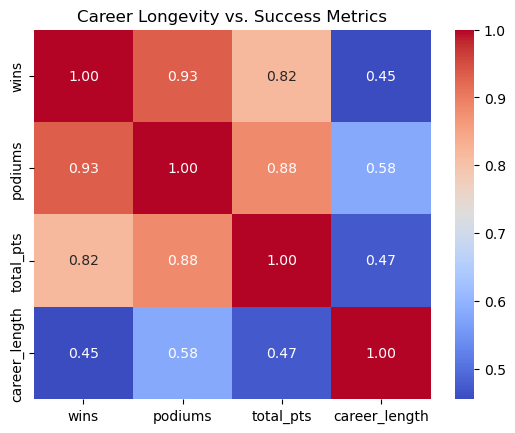

In [ ]:
sns.heatmap(driver_performance[['wins','podiums','total_pts','career_length']].corr(),annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Career Longevity vs. Success Metrics")
plt.show()

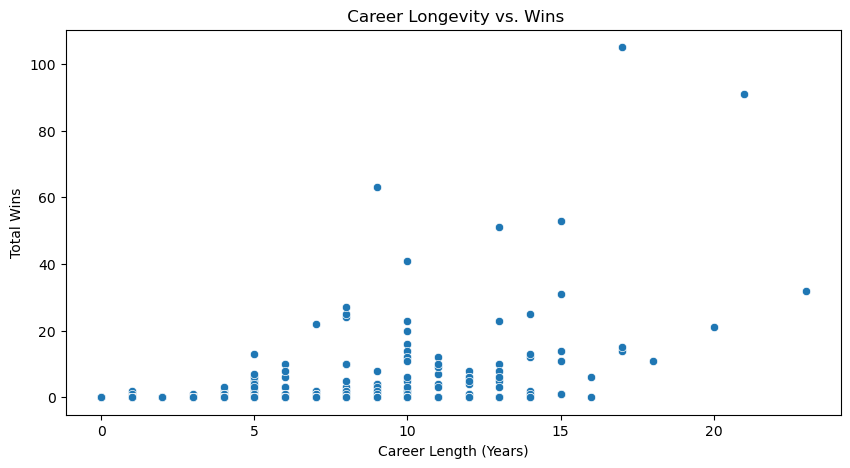

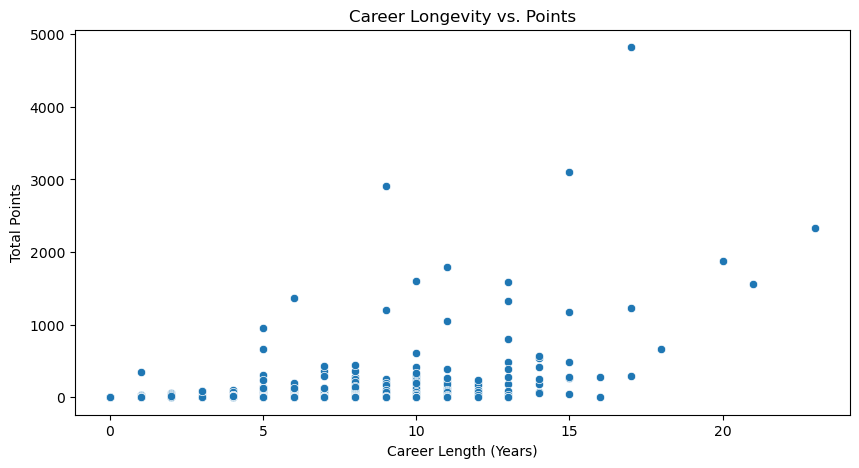

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=driver_performance['career_length'], y=driver_performance['wins'])
plt.xlabel("Career Length (Years)")
plt.ylabel("Total Wins")
plt.title(" Career Longevity vs. Wins")
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(x=driver_performance['career_length'], y=driver_performance['total_pts'])
plt.xlabel("Career Length (Years)")
plt.ylabel("Total Points")
plt.title("Career Longevity vs. Points")
plt.show()


2.	Qualifying vs. Race Performance<br>
	How does starting grid position impact final race results?<br>
	Do certain drivers excel at making up positions?


In [ ]:
results = pd.read_csv("final_dataset/results.csv")
drivers = pd.read_csv("final_dataset/drivers.csv")

results = results.merge(drivers[['driverId','forename','surname']], on='driverId', how='left')
results['forename'] = results['forename'].astype('str')
results['surname'] = results['surname'].astype('str')
results['Name']  = results['forename']+" "+results['surname']

results.drop(columns=['forename','surname'],inplace=True)

Correlation analysis

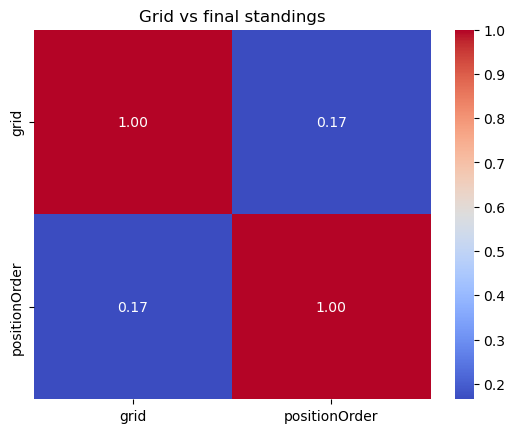

In [ ]:
sns.heatmap(results[['grid','positionOrder']].corr(),annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Grid vs final standings")
plt.show()

The above indicates that there does not exist much of a linear relationship b/w starting grid and finishing position.But we cant also ignore the fact that there is some(minimal) positive correlation which suggests that lower the starting position lower maybe the finishing position.

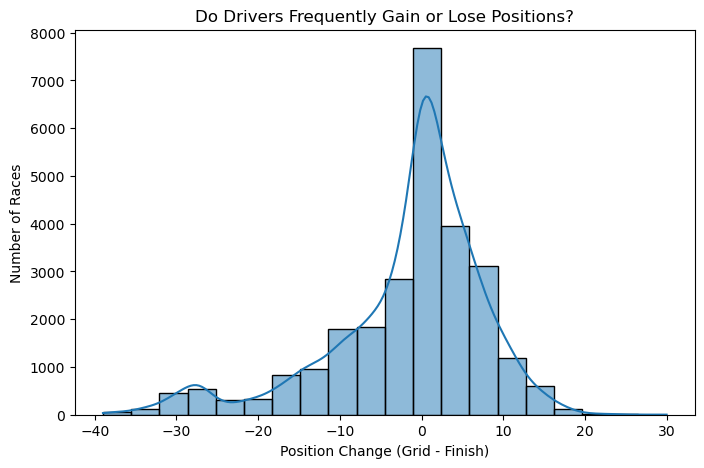

In [ ]:
results['position_change'] = results['grid'] - results['positionOrder']

plt.figure(figsize=(8,5))
sns.histplot(results['position_change'], bins=20, kde=True)
plt.xlabel("Position Change (Grid - Finish)")
plt.ylabel("Number of Races")
plt.title("Do Drivers Frequently Gain or Lose Positions?")
plt.show()


Indicates that mostly driver either gain or stay in same position

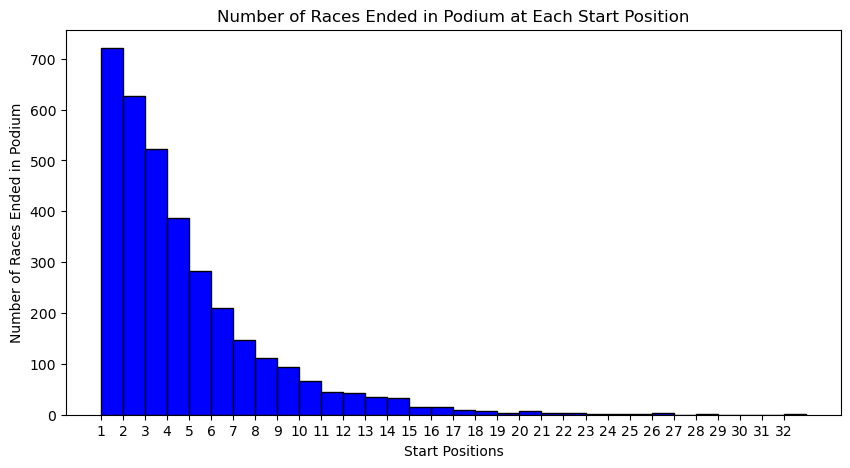

In [ ]:
import matplotlib.pyplot as plt

temp = results[results['positionOrder'] <= 3]

plt.figure(figsize=(10, 5))
plt.hist(temp['grid'], bins=range(temp['grid'].min(), temp['grid'].max() + 2), edgecolor='black', color='blue')
plt.xlabel("Start Positions")
plt.ylabel("Number of Races Ended in Podium")
plt.title("Number of Races Ended in Podium at Each Start Position")
plt.xticks(range(temp['grid'].min(), temp['grid'].max() + 1))
plt.show()


In [ ]:
top_drives_positions = results.groupby(['Name'])['position_change'].mean().reset_index().sort_values(by=['position_change'],ascending=[False])
top_drives_positions.head(10)

,Name,position_change
287,george amick,23.0
117,bud tingelstad,19.0
120,carl forberg,17.0
242,ernst klodwig,17.0
594,mike sparken,16.0
200,dieter quester,16.0
512,larry crockett,16.0
669,peter broeker,14.0
421,jim rigsby,14.0
80,bill mackey,14.0


This indicates that some drivers tend to do better performance at races to have maximum position change (end-start) compared to others.But we cannot say if they are best as some drivers who start and finish near the same position gets a low position change.BUt the above are the people who does best when it comes to making up positions

In [ ]:
temp = results[results['grid']<=3]
print("Drivers who make up the top 3 grids most number of times")
print(temp['Name'].value_counts().head(10))

Drivers who make up the top 3 grids most number of times
Name
lewis hamilton        218
michael schumacher    169
sebastian vettel      145
ayrton senna          119
alain prost           107
max verstappen        103
nigel mansell          91
valtteri bottas        86
kimi räikkönen         82
fernando alonso        74
Name: count, dtype: int64


3.	Pit Stop Strategies<br>
○	Evaluate optimal pit stop frequency and timing for race success.<br>
○	Analyze pit stop efficiency and its influence on race outcomes.


In [ ]:
results = pd.read_csv("final_dataset/results.csv")
pit_stops = pd.read_csv("final_dataset/pit_stops.csv")

pit_stops = pit_stops[['raceId','driverId','stop','milliseconds']]
pit_stops_cumulative = pit_stops.groupby(['raceId', 'driverId']).agg(total_pit_stops=('stop', 'count'), total_pit_time=('milliseconds', 'sum')).reset_index()
pit_stops_cumulative.head()

,raceId,driverId,total_pit_stops,total_pit_time
0,841,1,2,46426
1,841,2,2,48092
2,841,3,1,23716
3,841,4,3,72165
4,841,5,1,24865


In [ ]:
pit_stops_cumulative = pit_stops_cumulative.merge(results[['raceId', 'driverId', 'positionOrder']],on=['raceId', 'driverId'],how='left')
pit_stops_cumulative.head()

,raceId,driverId,total_pit_stops,total_pit_time,positionOrder
0,841,1,2,46426,2
1,841,2,2,48092,12
2,841,3,1,23716,17
3,841,4,3,72165,4
4,841,5,1,24865,18


In [ ]:
optimal_pits_mode = pit_stops_cumulative.groupby('total_pit_stops')['positionOrder'].agg(pd.Series.mode).reset_index()

print("Most Common Finishing Position by Pit Stop Count:")
print(optimal_pits_mode)

Most Common Finishing Position by Pit Stop Count:
   total_pit_stops positionOrder
0                1             2
1                2            13
2                3            17
3                4            15
4                5             5
5                6            14
6                7  [11, 13, 17]


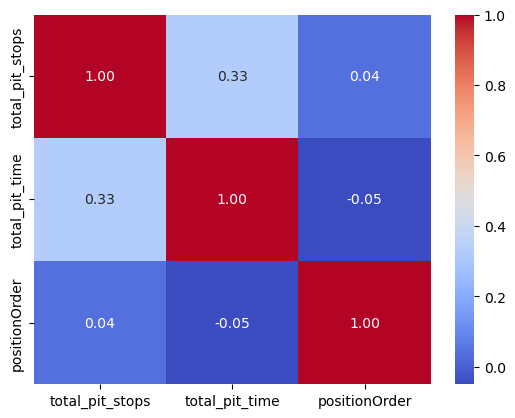

In [ ]:
sns.heatmap(pit_stops_cumulative[['total_pit_stops','total_pit_time','positionOrder']].corr(),annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

One Way Anova test i.e Attributes - groups of total pit time ,values -position/finish order

H₀ (Null Hypothesis): No difference in finishing positions across different pit stop time groups.
H₁ (Alternative Hypothesis): At least one group has significantly different finishing positions.

In [ ]:
from scipy.stats import f_oneway,f

low_pit_time = pit_stops_cumulative[pit_stops_cumulative['total_pit_time'] < pit_stops_cumulative['total_pit_time'].quantile(0.33)]['positionOrder']
medium_pit_time = pit_stops_cumulative[(pit_stops_cumulative['total_pit_time'] >= pit_stops_cumulative['total_pit_time'].quantile(0.33)) & (pit_stops_cumulative['total_pit_time'] < pit_stops_cumulative['total_pit_time'].quantile(0.66))]['positionOrder']
high_pit_time = pit_stops_cumulative[pit_stops_cumulative['total_pit_time'] >= pit_stops_cumulative['total_pit_time'].quantile(0.66)]['positionOrder']

stat,p= f_oneway(low_pit_time, medium_pit_time, high_pit_time)

k = 3
n = len(low_pit_time) + len(medium_pit_time) + len(high_pit_time)

df_between = k - 1
df_within = n - k
alpha = 0.05
f_critical = f.ppf(1 - alpha, df_between, df_within)
print(f"ANOVA Test: F-statistic = {stat:.3f}, F-critical = {f_critical:.3f}")
if stat > f_critical:
    print("Reject H0: Significant difference in finishing position based on pit stop time!")
else:
    print("Accept H0: No significant difference found.")


ANOVA Test: F-statistic = 12.434, F-critical = 2.997
Reject H0: Significant difference in finishing position based on pit stop time!


4.	Head-to-Head Driver Analysis:<br>
        Which rivalries have been the most competitive? Identify head-to-head stats based on race finishes.


In [ ]:
#Using a nested dictionary to store results Structure : {driver :{otherdriver1:{no_maches:x,no_wins:y}}}

results = pd.read_csv("final_dataset/results.csv")
drivers = pd.read_csv("final_dataset/drivers.csv")

results = results.merge(drivers[['driverId','forename','surname']], on='driverId', how='left')
results['forename'] = results['forename'].astype('str')
results['surname'] = results['surname'].astype('str')
results['Name']  = results['forename']+" "+results['surname']

results.drop(columns=['forename','surname'],inplace=True)


In [ ]:
head_to_head = {}
for i in results['Name'].unique():
    head_to_head[i] = {}
    for j in results['Name'].unique():
        if i!=j :
            head_to_head[i][j] = {'no_matches':0,'wins':0}

In [ ]:
from itertools import combinations

for race_id, race_data in results.groupby('raceId'):
    driver_positions = race_data[['Name', 'positionOrder']].set_index('Name').to_dict()['positionOrder']
    for driver1, driver2 in combinations(driver_positions.keys(), 2):
        head_to_head[driver1][driver2]['no_matches'] += 1
        head_to_head[driver2][driver1]['no_matches'] += 1
        if driver_positions[driver1] < driver_positions[driver2]:  # Lower positionOrder = better finish
            head_to_head[driver1][driver2]['wins'] += 1
        else:
            head_to_head[driver2][driver1]['wins'] += 1

In [ ]:
for i in head_to_head.keys():
    for j in head_to_head[i].keys():
        if head_to_head[i][j]['no_matches'] != 0:
            head_to_head[i][j]['wins ratio'] = head_to_head[i][j]['wins']/head_to_head[i][j]['no_matches']
        else:
            head_to_head[i][j]['wins ratio'] = 0

In [ ]:
h2h_list = []

for driver1 in head_to_head:
    for driver2 in head_to_head[driver1]:
        stats = head_to_head[driver1][driver2]
        h2h_list.append([driver1, driver2, stats['no_matches'], stats['wins'], stats['wins ratio']])

h2h_df = pd.DataFrame(h2h_list, columns=['Driver1', 'Driver2', 'No_Matches', 'Wins', 'Win_Ratio'])
top_h2h = h2h_df[(h2h_df['Win_Ratio']>=0.47) & (h2h_df['Win_Ratio']<=0.55)].sort_values(by=['No_Matches','Win_Ratio'],ascending=[False,True])

print("Top 10 F1 Rivalries:")
print(top_h2h.head(10))

Top 10 F1 Rivalries:
                   Driver1             Driver2  No_Matches  Wins  Win_Ratio
6023        kimi räikkönen     fernando alonso         882   480   0.544218
701714    daniel ricciardo        sergio pérez         765   360   0.470588
700854        sergio pérez    daniel ricciardo         765   405   0.529412
10336         felipe massa       jenson button         753   375   0.498008
14632        jenson button        felipe massa         753   378   0.501992
18073   rubens barrichello     david coulthard         741   360   0.485830
11200      david coulthard  rubens barrichello         741   381   0.514170
700043        sergio pérez     fernando alonso         732   402   0.549180
701718    daniel ricciardo     valtteri bottas         678   327   0.482301
705155     valtteri bottas    daniel ricciardo         678   351   0.517699


    5. Hypothetical Driver Swaps:<br>
        ◦ Swap two drivers between different teams and predict the impact on team and driver standings.<br>
        (Since drivers have been in different teams in different seasons we study the impact by swapping drivers last team as available in the dataset)

In [209]:
drivers = pd.read_csv("final_dataset/drivers.csv")
constructors = pd.read_csv("final_dataset/constructors.csv")
driver_standings = pd.read_csv("final_dataset/driver_standings.csv")
constructor_standings = pd.read_csv("final_dataset/constructor_standings.csv")
results = pd.read_csv("final_dataset/results.csv")
races = pd.read_csv("final_dataset/races.csv")

results = results.merge(drivers[['driverId', 'forename','surname']], on='driverId', how='left')
results['forename'] = results['forename'].astype('str')
results['surname'] = results['surname'].astype('str')
results['Name']  = results['forename']+" "+results['surname']
results.drop(columns=['forename','surname'],inplace=True)
results = results.merge(constructors[['constructorId', 'name']], on='constructorId', how='left')
results = results.merge(races[['raceId', 'year']], on='raceId', how='left')
results.rename(columns={'name':'constructor_name'},inplace=True)
print(results.head())

   resultId  raceId  driverId  constructorId number  grid positionText  \
0         1      18         1              1     22     1            1   
1         2      18         2              2      3     5            2   
2         3      18         3              3      7     7            3   
3         4      18         4              4      5    11            4   
4         5      18         5              1     23     3            5   

   positionOrder  points  laps milliseconds fastestLap rank fastestLapSpeed  \
0              1    10.0    58      5690616         39    2         218.300   
1              2     8.0    58      5696094         41    3         217.586   
2              3     6.0    58      5698779         41    5         216.719   
3              4     5.0    58      5707797         58    7         215.464   
4              5     4.0    58      5708630         43    1         218.385   

     status  fastestlaptime_ms               Name constructor_name  year  
0  Fi

In [210]:
driver1 = 'max verstappen'
driver2 = 'fernando alonso'

In [222]:
verstappen_teams = results[results['Name'] == driver1][['year', 'constructor_name']].drop_duplicates()
print("\nMax Verstappen's Teams by Year:")
print(verstappen_teams)

button_teams = results[results['Name'] == driver2][['year', 'constructor_name']].drop_duplicates()
print("\n'fernando alonso's Teams by Year:")
print(button_teams)



Max Verstappen's Teams by Year:
       year constructor_name
22546  2015       toro rosso
22921  2016       toro rosso
23000  2016         red bull
23378  2017         red bull
23782  2018         red bull
24199  2019         red bull
24639  2020         red bull
24961  2021         red bull
25418  2022         red bull
25840  2023         red bull
26280  2024         red bull

'fernando alonso's Teams by Year:
       year constructor_name
3      2008          renault
369    2007          mclaren
742    2006          renault
1140   2005          renault
1516   2004          renault
1880   2003          renault
2567   2001          minardi
7557   2009          renault
20320  2010          ferrari
20779  2011          ferrari
21233  2012          ferrari
21710  2013          ferrari
22130  2014          ferrari
22569  2015          mclaren
22932  2016          mclaren
23387  2017          mclaren
23781  2018          mclaren
24978  2021   alpine f1 team
25408  2022   alpine f1 team
2584

In [223]:
swap_year = 2015
verstappen_team = results[(results['Name'] == driver1) & (results['year'] == swap_year)]['constructor_name'].iloc[0]
fernando_team = results[(results['Name'] == driver2) & (results['year'] == swap_year)]['constructor_name'].iloc[0]
print(f"Swapping Verstappen ({verstappen_team}) <-> Fernando ({fernando_team}) in {swap_year}")
results_swapped = results.copy()
results_swapped.loc[(results_swapped['Name'] == driver1) & (results_swapped['year'] == swap_year), 'constructor_name'] = fernando_team
results_swapped.loc[(results_swapped['Name'] == driver2) & (results_swapped['year'] == swap_year), 'constructor_name'] = verstappen_team
print(results_swapped[(results_swapped['Name'].isin([driver1, driver2])) & (results_swapped['year'] == swap_year)])

Swapping Verstappen (toro rosso) <-> Fernando (mclaren) in 2015
       resultId  raceId  driverId  constructorId number  grid positionText  \
22546     22550     926       830              5     33    11            R   
22558     22562     927       830              5     33     6            7   
22569     22573     927         4              1     14    18            R   
22583     22587     928         4              1     14    18           12   
22588     22592     928       830              5     33    13           17   
22602     22606     929         4              1     14    14           11   
22609     22613     929       830              5     33    15            R   
22622     22626     930       830              5     33     6           11   
22631     22635     930         4              1     14    13            R   
22649     22653     931       830              5     33     9            R   
22650     22654     931         4              1     14    13            R   


In [224]:
driver_points = results.groupby(['year', 'Name'])['points'].sum().reset_index()
driver_points = driver_points[driver_points['year']==swap_year].sort_values(by=['year', 'points'], ascending=[False, False])

print("Driver Standings before Swap:")
print(driver_points.head(10))
print(driver1,"\n")
print(driver_points[driver_points['Name']==driver1])
print("\n",driver2)
print(driver_points[driver_points['Name']==driver2])

constructor_points = results.groupby(['year', 'constructor_name'])['points'].sum().reset_index()
constructor_points = constructor_points[constructor_points['year']==swap_year].sort_values(by=['year', 'points'], ascending=[False, False])


print("\nConstructor Standings before Swap:")
print(constructor_points.head(10))
print("toro rosso\n")
print(constructor_points[constructor_points['constructor_name']=='toro rosso'])
print("\nmclaren")
print(constructor_points[constructor_points['constructor_name']=='mclaren'])


Driver Standings before Swap:
      year              Name  points
2998  2015    lewis hamilton   381.0
3002  2015      nico rosberg   322.0
3006  2015  sebastian vettel   278.0
2997  2015    kimi räikkönen   150.0
3008  2015   valtteri bottas   136.0
2992  2015      felipe massa   121.0
2991  2015      daniil kvyat    95.0
2990  2015  daniel ricciardo    92.0
3007  2015      sergio pérez    78.0
3001  2015   nico hülkenberg    58.0
max verstappen 

      year            Name  points
3000  2015  max verstappen    49.0

 fernando alonso
      year             Name  points
2994  2015  fernando alonso    11.0

Constructor Standings before Swap:
      year constructor_name  points
1015  2015         mercedes   703.0
1010  2015          ferrari   428.0
1019  2015         williams   257.0
1016  2015         red bull   187.0
1011  2015      force india   136.0
1012  2015         lotus f1    78.0
1018  2015       toro rosso    67.0
1017  2015           sauber    36.0
1014  2015          mclare

In [225]:
driver_points = results_swapped.groupby(['year', 'Name'])['points'].sum().reset_index()
driver_points = driver_points[driver_points['year']==swap_year].sort_values(by=['year', 'points'], ascending=[False, False])

print("Updated Driver Standings After Swap:")
print(driver_points.head(10))
print(driver1,"\n")
print(driver_points[driver_points['Name']==driver1])
print("\n",driver2)
print(driver_points[driver_points['Name']==driver2])

constructor_points_swapped = results_swapped.groupby(['year', 'constructor_name'])['points'].sum().reset_index()
constructor_points_swapped = constructor_points_swapped[constructor_points_swapped['year']==swap_year].sort_values(by=['year', 'points'], ascending=[False, False])

print("\nUpdated Constructor Standings After Swap:")
print(constructor_points_swapped.head(10))
print("toro rosso\n")
print(constructor_points_swapped[constructor_points_swapped['constructor_name']=='toro rosso'])
print("\nmclaren")
print(constructor_points_swapped[constructor_points_swapped['constructor_name']=='mclaren'])

Updated Driver Standings After Swap:
      year              Name  points
2998  2015    lewis hamilton   381.0
3002  2015      nico rosberg   322.0
3006  2015  sebastian vettel   278.0
2997  2015    kimi räikkönen   150.0
3008  2015   valtteri bottas   136.0
2992  2015      felipe massa   121.0
2991  2015      daniil kvyat    95.0
2990  2015  daniel ricciardo    92.0
3007  2015      sergio pérez    78.0
3001  2015   nico hülkenberg    58.0
max verstappen 

      year            Name  points
3000  2015  max verstappen    49.0

 fernando alonso
      year             Name  points
2994  2015  fernando alonso    11.0

Updated Constructor Standings After Swap:
      year constructor_name  points
1015  2015         mercedes   703.0
1010  2015          ferrari   428.0
1019  2015         williams   257.0
1016  2015         red bull   187.0
1011  2015      force india   136.0
1012  2015         lotus f1    78.0
1014  2015          mclaren    65.0
1017  2015           sauber    36.0
1018  2015  

From the updated stats we can clearly see that the driver standings does not change as we do not affect a individuals performance by swapping teams and also assuming all other factors like pit stop strategies are almost same for the swapped teams.

Also we can see that by swapping teams of a higher ranked driver like max verstappen with team of low ranked driver like fernandez leads to a drastic change in constructor standings.The rankings between the teams is inverted.